Давайте посмотрим, как регуляризация влияет на качество классификации на наборе данных по тестированию микрочипов из курса Andrew Ng по машинному обучению. Мы будем использовать логистическую регрессию с полиномиальными признаками и изменять параметр регуляризации. Рассмотрим, как регуляризация влияет на разделительную границу классификатора и интуитивно распознаем недо- и переобучение. Затем мы выберем параметр регуляризации, который будет численно близок к оптимальному значению с помощью кросс-валидации и GridSearch.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('microchips.txt', header = None, names=("test1", "test2", "released"))

Это датасет из 118 наблюдений тестирований чипов. Тесты - численные признаки, а таргет - вышел чип в продакш или нет. Переменные центрированы, что это значит? Это значит, что из каждого значения в колонках вычтено среднее по колонке, таким образом средние значения тестов равны 0.

In [3]:
data

,test1,test2,released
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


<AxesSubplot:>

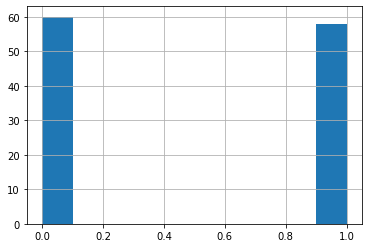

In [5]:
data['released'].hist()

In [8]:
X = data.iloc[:, :2].values
y = data.iloc[:, -1].values

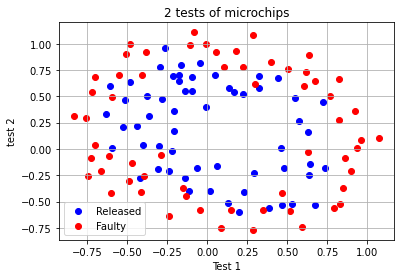

In [15]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="red", label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("test 2")
plt.title("2 tests of microchips")
plt.legend()
plt.grid()

In [16]:
def plot_boundary(model, X, y, grid_step=0.01, poly_featurizer=None):
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step)
    )
    
    Z = model.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [17]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

In [19]:
X_poly.shape

(118, 36)

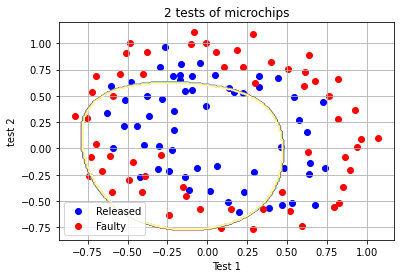

In [21]:
C = 0.01
logist = LogisticRegression(C=C, random_state=17)
logist.fit(X_poly, y)

plot_boundary(logist, X, y, poly_featurizer=poly)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="red", label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("test 2")
plt.title("2 tests of microchips")
plt.legend()
plt.grid()

In [23]:
print("Accuracy:", round(logist.score(X_poly, y), 3))

Accuracy: 0.627


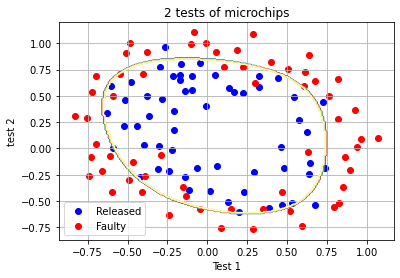

In [24]:
C = 1
logist = LogisticRegression(C=C, random_state=17)
logist.fit(X_poly, y)

plot_boundary(logist, X, y, poly_featurizer=poly)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="red", label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("test 2")
plt.title("2 tests of microchips")
plt.legend()
plt.grid()

In [25]:
print("Accuracy:", round(logist.score(X_poly, y), 3))

Accuracy: 0.831


C:\Users\sente\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


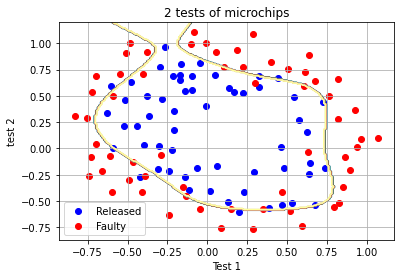

In [26]:
C = 10000
logist = LogisticRegression(C=C, random_state=17)
logist.fit(X_poly, y)

plot_boundary(logist, X, y, poly_featurizer=poly)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="red", label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("test 2")
plt.title("2 tests of microchips")
plt.legend()
plt.grid()

In [27]:
print("Accuracy:", round(logist.score(X_poly, y), 3))

Accuracy: 0.873


In [28]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logist_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logist_searcher.fit(X_poly, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       6.45088409e+02, 6.60144909e+02, 6.75552832e+02, 6.91320378e+02,
       7.07455942e+02, 7.23968114e+02, 7.40865683e+02, 7.58157646e+02,
       7.75853206e+02, 7.93961785e+02, 8.12493021e+02, 8.31456781e+02,
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     n_jobs=-1, verbose=1)

In [30]:
logist_searcher.C_

array([150.78450459])

In [33]:
logist_searcher.coef_

array([[-0.00978183,  1.75048879,  4.99075018, -5.8142767 , -7.26028057,
        -5.08931273,  2.88968721,  0.50075279,  3.48239276, -2.93846879,
        -3.24382302,  3.21415179, -4.46359359, -1.32987365, -7.52621495,
        -0.81917779, -1.07107295,  5.35882532, -3.86823974, -3.99029654,
         1.3442982 , -5.89181347,  0.04607323, -1.14228236,  3.97573818,
        -5.47122215, -3.32430227, -1.79691614, -2.95989417, -0.36613774,
         0.96729595, -1.44665966,  2.35187666, -2.9510356 , -5.72995807,
         3.73414078]])

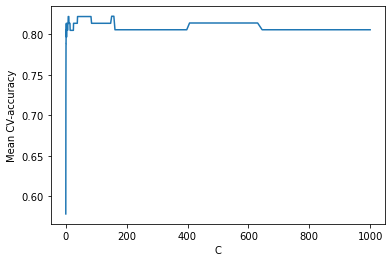

In [35]:
plt.plot(c_values, np.mean(logist_searcher.scores_[1], axis=0))
plt.xlabel("C")
plt.ylabel("Mean CV-accuracy");

# Iris flower dataset

In [41]:
from sklearn.datasets import load_iris

In [42]:
iris = load_iris(as_frame=True)

In [56]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [45]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [44]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [68]:
iris.data['sepal length (cm)'].min(), iris.data['sepal length (cm)'].max()

(4.3, 7.9)

In [49]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [85]:
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [78]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [79]:
[0.2, 0.8]

[0.2, 0.8]

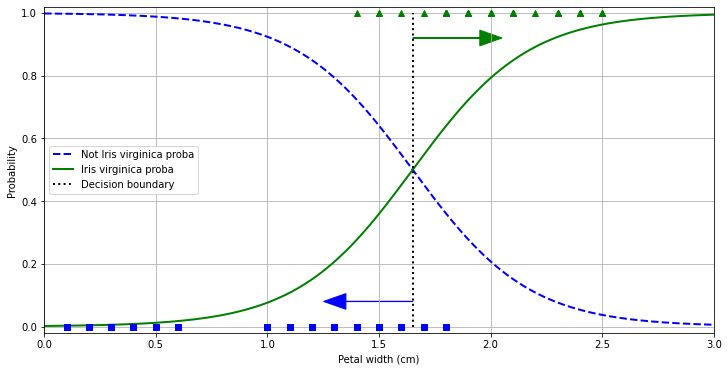

In [80]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # generated values in cm (in orderd to plot smoothly lines)

y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(12, 6))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")

plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

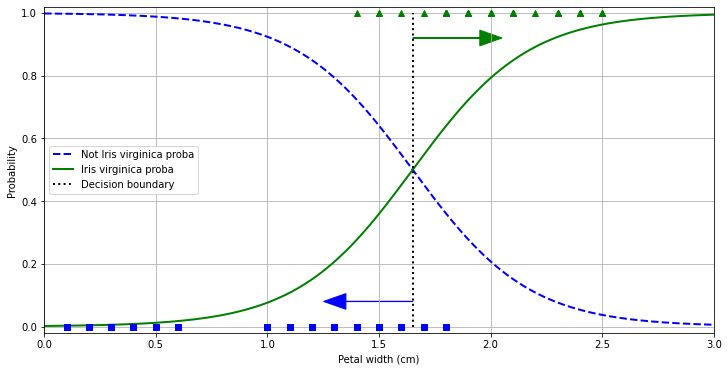

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # generated values in cm (in orderd to plot smoothly lines)

y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(12, 6))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")

plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

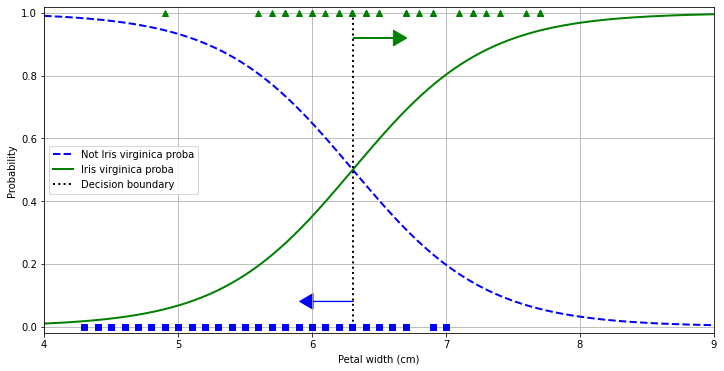

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["sepal length (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

X_new = np.linspace(4, 9, 1000).reshape(-1, 1) # generated values in cm (in orderd to plot smoothly lines)

y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(12, 6))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")

plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([4, 9, -0.02, 1.02])
plt.grid()